***Plot the probability distributions of the pose of a marker***
Each observation implies a marker position in the world frame, if the nominal robot model is assumed exact. This script calculates the would be pose of the marker from each observation, and plots a curve approximateing an underlying PDF

In [1]:
import pickle
import numpy as np
from parameter_estimator import ParameterEstimator
import utils
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from robot import *

In [2]:
# import nominal positions of markers
with open('points.p', 'rb') as f:
    pointlist = pickle.load(f)  # deserialize using load()

nominal_locations = {}
nominal_locations_rounded = {}
for i, point in enumerate(np.array(pointlist).T):
    nominal_locations[i+1] = np.concatenate((point[0:3], np.zeros(1), point[3:5]))
    nominal_locations_rounded[i+1] = np.around(nominal_locations[i+1], 4)
#     print(f"{i+1}: {nominal_locations[i+1]}")
#     print(f"{i+1}: {nominal_locations_rounded[i+1]}\n")

    

In [3]:
def get_marker_locations(df):
    marker_locations = []
    theta_nom = RobotDescription.dhparams["theta_nom"].astype(float)
    d_nom = RobotDescription.dhparams["d_nom"].astype(float)
    r_nom = RobotDescription.dhparams["r_nom"].astype(float)
    alpha_nom = RobotDescription.dhparams["alpha_nom"].astype(float)
    for record in df.to_records():
        q = np.concatenate([record['q'], np.zeros(RobotDescription.dhparams['num_cam_extrinsic'])])
        _loc = RobotDescription.get_marker_location(record['mat'], q, theta_nom, d_nom, r_nom, alpha_nom)
        marker_location = RobotDescription.get_alternate_tfs(_loc)
        marker_locations.append(np.concatenate([marker_location['rvec'], marker_location['tvec']]))
    return marker_locations

In [58]:
# import observations from file

# select observations file
observations_file_select = 3
observations_file_str_dict = {1: r'observation_files/ground_truth_dataset.p',
                              2: r'observation_files/obs_exp_26_04_001_2024-04-26-11-19-23_20240426-112528.p',
                              3: r'observation_files/obs_exp_26_04_002_2024-04-26-12-06-53_20240426-123809.p'}

df_observations = pd.read_pickle(observations_file_str_dict[observations_file_select])
present_ids = list(set(list(df_observations['marker_id'].to_numpy())))
print(present_ids)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]


In [72]:
get_marker_locations(df_observations)

[array([ 2.7155773 ,  0.62221507, -1.05718989, -1.32963697, -0.64020389,
         1.3522558 ]),
 array([ 2.714336  ,  0.62386355, -1.05925399, -1.32915173, -0.6399096 ,
         1.35236981]),
 array([ 2.71490236,  0.61789511, -1.05950805, -1.32970446, -0.6401263 ,
         1.35228777]),
 array([ 2.71489117,  0.62039486, -1.06053237, -1.32917292, -0.64003285,
         1.35229514]),
 array([ 2.71515387,  0.62002694, -1.05976928, -1.32909271, -0.64031574,
         1.3521793 ]),
 array([ 2.71466233,  0.6183596 , -1.06031606, -1.32957878, -0.64033152,
         1.35233795]),
 array([ 2.31588805,  1.84410722, -0.30801037, -0.43147205, -1.88682615,
         0.51776074]),
 array([ 2.3139658 ,  1.84194977, -0.31134117, -0.43123975, -1.88530234,
         0.51804575]),
 array([ 2.31532924,  1.84276556, -0.30849508, -0.43116894, -1.88649234,
         0.51784208]),
 array([ 2.31601552,  1.84443262, -0.30504466, -0.43144137, -1.88818433,
         0.51693971]),
 array([ 2.31482598,  1.84428016, -0.310

In [65]:
df = df_observations[df_observations['marker_id']==1]
test = [utils.mat2rvectvec(m) for m in df['mat']]
test = np.array([np.concatenate([r,t]) for (r,t) in test])
print(test)

[[ 0.33665046  2.5619638   0.79802802  2.23104528 -0.93815258 -0.3826633 ]
 [ 0.24612349  2.65153682  0.8415483   2.26534421 -0.74236069 -0.50673876]
 [ 0.1842198   2.7084517   0.87073282  2.27008508 -0.61498231 -0.59905427]]


/tmp/ipykernel_11668/4038494583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[:,0])


<AxesSubplot: ylabel='Density'>

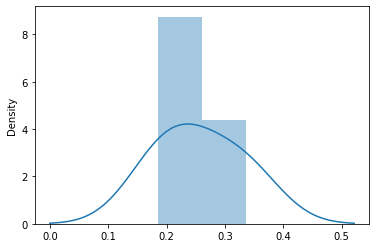

In [66]:
sns.distplot(test[:,0])

/tmp/ipykernel_11668/4020303935.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[:,1])


<AxesSubplot: ylabel='Density'>

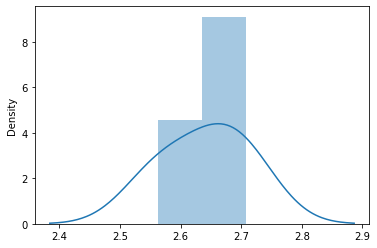

In [67]:
sns.distplot(test[:,1])

/tmp/ipykernel_11668/2108849405.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[:,2])


<AxesSubplot: ylabel='Density'>

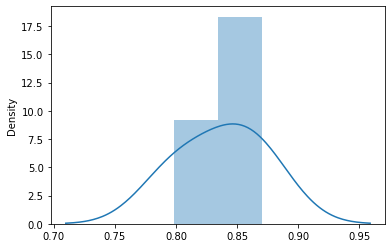

In [68]:
sns.distplot(test[:,2])

/tmp/ipykernel_11668/865279839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[:,3])


<AxesSubplot: ylabel='Density'>

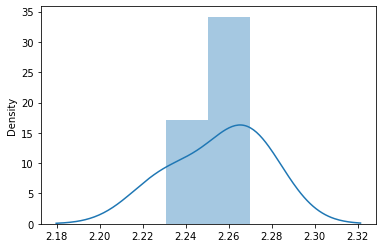

In [69]:
sns.distplot(test[:,3])

/tmp/ipykernel_11668/2070237567.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[:,4])


<AxesSubplot: ylabel='Density'>

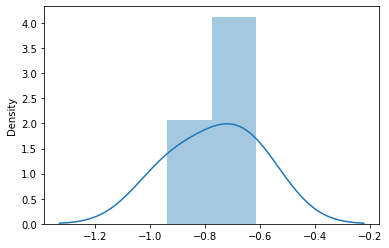

In [70]:
sns.distplot(test[:,4])

/tmp/ipykernel_11668/3451656177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[:,5])


<AxesSubplot: ylabel='Density'>

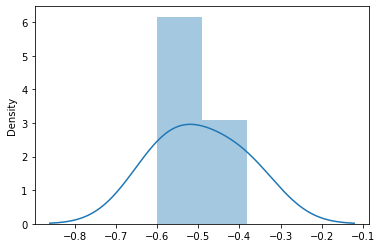

In [71]:
sns.distplot(test[:,5])